<a href="https://colab.research.google.com/github/Vidi005/Submission-Machine-Learning-Pemula-Dicoding/blob/master/Submission_Machine_Learning_Pemula_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission *Machine Learning* Pemula**

Program untuk mengenali bentuk jari tangan yang membentuk gunting, kertas, atau batu.
<br>
Program ini dibuat menggunakan CNN dengan library Keras dan backend TensorFlow.

## Data Diri



*   Nama: Vidi Fitriansyah Hidarlan
*   Asal: Cirebon, Jawa Barat, Indonesia
*   Akun Sosmed:

> <img src="https://dicodingacademy.blob.core.windows.net/avatarimages/2020083014543586fd2698b46d4d9bb79b681f1c7c1e6d.png" width="16"> https://www.linkedin.com/in/vidi-fitriansyah-hidarlan-0b23931a4
<br>
> <img src="http://assets.stickpng.com/images/580b57fcd9996e24bc43c521.png" width="24"> https://instagram.com/vidi005
<br>
> <img src="https://dicodingacademy.blob.core.windows.net/avatarimages/202008301500305675fe3366d8d8ec303afeb313052774.png" width="18"> https://vidi005.blogspot.com

*   E-mail: vidihidarlan@gmail.com





## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage.io import imread
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from skimage.transform import resize
from keras.utils.np_utils import to_categorical

# Mengihitung waktu lamanya eksekusi tiap sel di Google Colab
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1831 sha256=f2033c44a1fd24c3993604aa4de6ab77bf5b193cf43ba047be887432ed8958a2
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


### Checking TensorFlow Version

In [2]:
print(tf.__version__)

2.3.0
time: 772 µs


## Preprocessing Datasets

Mengunduh dataset rockpaperscissors dan menyimpannya di penyimpanan sementara pada Google Colab di dalam direktori "content".
<br>
(Dataset yang digunakan berlatar belakang warna hijau).

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/rockpaperscissors.zip

--2020-09-30 05:27:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  12.3MB/s    in 46s     

2020-09-30 05:28:31 (6.69 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]

time: 46.9 s


Extracting datasets into "datasets" directory.

In [4]:
#Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = "rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/datasets")
zip_ref.close()

time: 3.43 s


Deleting unused dataset directories folder

In [5]:
# Menghapus folder dataset pelatihan yang tidak diperlukan
import shutil
import os
shutil.rmtree("/content/datasets/__MACOSX", ignore_errors=False, onerror=None)
shutil.rmtree("/content/datasets/rockpaperscissors/rps-cv-images", ignore_errors=False, onerror=None)
os.remove("/content/datasets/rockpaperscissors/README_rpc-cv-images.txt")

time: 205 ms


### Visualizing one of picture for each class

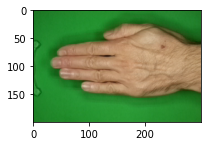

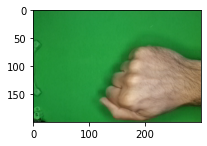

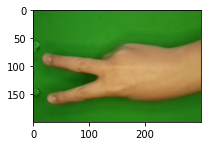

time: 425 ms


In [6]:
# Perintah untuk memvisualisasikan satu gambar dari dataset
# kertas
image = imread("datasets/rockpaperscissors/paper/0a3UtNzl5Ll3sq8K.png")
plt.figure(figsize=(3,3))
plt.imshow(image)
# batu
image = imread("datasets/rockpaperscissors/rock/00nKV8oHuTGi20gq.png")
plt.figure(figsize=(3,3))
plt.imshow(image)
# gunting
image = imread("datasets/rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png")
plt.figure(figsize=(3,3))
plt.imshow(image)

### Creating Object ImageDataGenerator & Data Augmentation

Membuat obyek gambar *dataset* dengan **ImageDataGenerator**, Autmentasi *dataset*, dan Membagi *dataset* validasi (*validation*) sebesar 40% dan *dataset* pelatihan (*training*) sebesar 60%.

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split = 0.4,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,    
    vertical_flip = True,
    fill_mode = "nearest")

time: 4.62 ms


### Using ImageDataGenerator Object

Menggunakan obyek **ImageDataGenerator** yang sudah dibuat

In [8]:
#Memuat dataset pelatihan & validasi
base_dir = os.path.join("datasets/rockpaperscissors")

img_size = 224
batch_size = 64

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size, 
    subset='training',
    class_mode= 'categorical')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size, 
    subset='validation',
    class_mode= 'categorical')

#Menampilkan bentuk dari masing-masing dataset
for image_batch, label_batch in train_generator:
  break
print("Bentuk array dari dataset train (pelatihan) adalah:", image_batch.shape,label_batch.shape)
for image_batch, label_batch in val_generator:
  break
print("Bentuk array dari dataset validation (validasi) adalah:", image_batch.shape,label_batch.shape)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Bentuk array dari dataset train (pelatihan) adalah: (64, 224, 224, 3) (64, 3)
Bentuk array dari dataset validation (validasi) adalah: (64, 224, 224, 3) (64, 3)
time: 1.59 s


## Developing CNN Architecture (Creating Model)

*Membuat* arsitektur CNN mulai dari  Lapisan Masukkan (*Input Layer*), Lapisan Konvolusi (*Convolution Layer*), Lapisan aktivasi (*Activation Layer*), *Pooling Layer*, dan Lapisan terhubung erat (*Fully Connected Layer/Densely Connected Layer*).

In [9]:
# LeNet Architecture Model
INPUT_SHAPE = 224
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(INPUT_SHAPE, INPUT_SHAPE, 3), padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, name="fc"),
    tf.keras.layers.Activation("softmax")
])

time: 5.64 s


### Compiling Model

In [10]:
model.compile("adam",loss="categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

### Training Model

Melatih model dari arsitektur CNN yang telah dibuat. Pada program ini dibuat sebanyak 75 epoch, namun jika *error/loss* pada *validation* sudah semakin kecil dan tidak adanya penurunan sebanyak 8 kali dan/atau di bawah 0,09 sebelum *epoch* ke 100 maka akan berhenti di *epoch* tersebut.

In [11]:
es = EarlyStopping(monitor="val_loss", patience=8, verbose=1, min_delta=0.09, mode="auto")
history = model.fit(train_generator, 
                    epochs = 100, 
                    callbacks = [es],
                    validation_data = val_generator)

Epoch 1/100
21/21 [==============================] - 23s 1s/step - loss: 1.0867 - acc: 0.3562 - val_loss: 1.0307 - val_acc: 0.4668
Epoch 2/100
21/21 [==============================] - 23s 1s/step - loss: 1.0187 - acc: 0.4833 - val_loss: 0.9740 - val_acc: 0.5034
Epoch 3/100
21/21 [==============================] - 23s 1s/step - loss: 0.9545 - acc: 0.5297 - val_loss: 0.9228 - val_acc: 0.5389
Epoch 4/100
21/21 [==============================] - 23s 1s/step - loss: 0.9029 - acc: 0.6446 - val_loss: 0.8888 - val_acc: 0.7151
Epoch 5/100
21/21 [==============================] - 23s 1s/step - loss: 0.7634 - acc: 0.7314 - val_loss: 0.6449 - val_acc: 0.7792
Epoch 6/100
21/21 [==============================] - 23s 1s/step - loss: 0.6028 - acc: 0.7801 - val_loss: 0.5752 - val_acc: 0.7849
Epoch 7/100
21/21 [==============================] - 23s 1s/step - loss: 0.5314 - acc: 0.7884 - val_loss: 0.5236 - val_acc: 0.7975
Epoch 8/100
21/21 [==============================] - 23s 1s/step - loss: 0.4635 - a

### Visualizing Training Model Result

Menampilkan grafik model hasil pelathiannya pada setiap *epoch*.

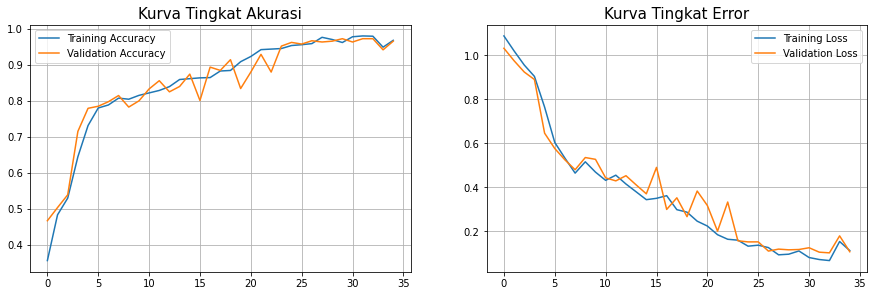

time: 274 ms


In [12]:
fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(history.history["acc"],label = "Training Accuracy")
plt.plot(history.history["val_acc"],label = "Validation Accuracy")
plt.legend()
plt.title("Kurva Tingkat Akurasi", size=15)
plt.grid(zorder = 0)

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"],label = "Training Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.title("Kurva Tingkat Error", size=15)
plt.grid(zorder = 0)
plt.show()

## Prediction from Image Files

Menguji hasil prediksi gambar yang diupload terhadap model hasil pelatihannya.

Saving IMG20200926101203.jpg to IMG20200926101203.jpg
Prediksi: rock


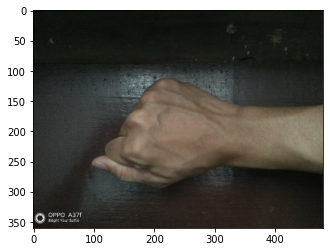

time: 1min 3s


In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(image.load_img(path, target_size=(360,480)))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  prediction = np.argmax(classes, axis=1)
  
  if prediction[0]==0:
    print("Prediksi: paper")
  elif prediction[0]==1:
    print("Prediksi: rock")
  else:
    print("Prediksi: scissors")